In [1]:
# Import necessary modules and functions
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append('../scripts')
import Preprocessing as dp


In [2]:
#load Dataset
df = pd.read_csv("../data/MSFT_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [3]:
df.shape

(9672, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


In [5]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
df.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume      Dividends  Stock Splits
1986-03-13  0.088542    0.101563    0.088542    0.097222    0.059946    1031788800  0.0        0.0             1
2011-09-27  25.660000   25.920000   25.450001   25.670000   20.141129   55620700    0.0        0.0             1
2011-09-29  25.980000   26.170000   25.090000   25.450001   19.968504   63407300    0.0        0.0             1
2011-09-30  25.200001   25.500000   24.879999   24.889999   19.529129   54060500    0.0        0.0             1
2011-10-03  24.719999   25.340000   24.520000   24.530001   19.246662   64592500    0.0        0.0             1
                                                                                                              ..
1998-12-11  32.750000   33.671875   32.687500   33.500000   20.655895   51728800    0.0        0.0             1
1998-12-14  33.187500   33.437500   31.921875   31.984375   19.721373   64077600    0.0        0.0   

In [7]:
# Calculate summary statistics
dp.summary_statistics(df)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9.672000e+03,9672.000000,9672.000000
mean,58.402199,59.003071,57.784759,58.417683,52.719365,5.677678e+07,0.002982,0.001758
std,90.122302,90.958645,89.232546,90.146786,90.066461,3.814123e+07,0.046524,0.057944
min,0.088542,0.092014,0.088542,0.090278,0.055665,2.304000e+06,0.000000,0.000000
25%,5.695313,5.770508,5.617188,5.695313,3.511695,3.206982e+07,0.000000,0.000000
50%,27.304999,27.600000,27.085000,27.341875,19.145540,4.990225e+07,0.000000,0.000000
75%,46.687500,47.099998,46.138672,46.657187,38.339042,7.071788e+07,0.000000,0.000000
max,467.000000,468.350006,464.459991,467.559998,466.718781,1.031789e+09,3.080000,2.000000


In [8]:
# Check for missing values
dp.check_missing_values(df)

Missing Values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# Convert 'Date' column to datetime and set it as index
df = dp.convert_date(df)
df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [10]:
# Calculate technical indicators
df = dp.calculate_technical_indicators(df)
df.head(60)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


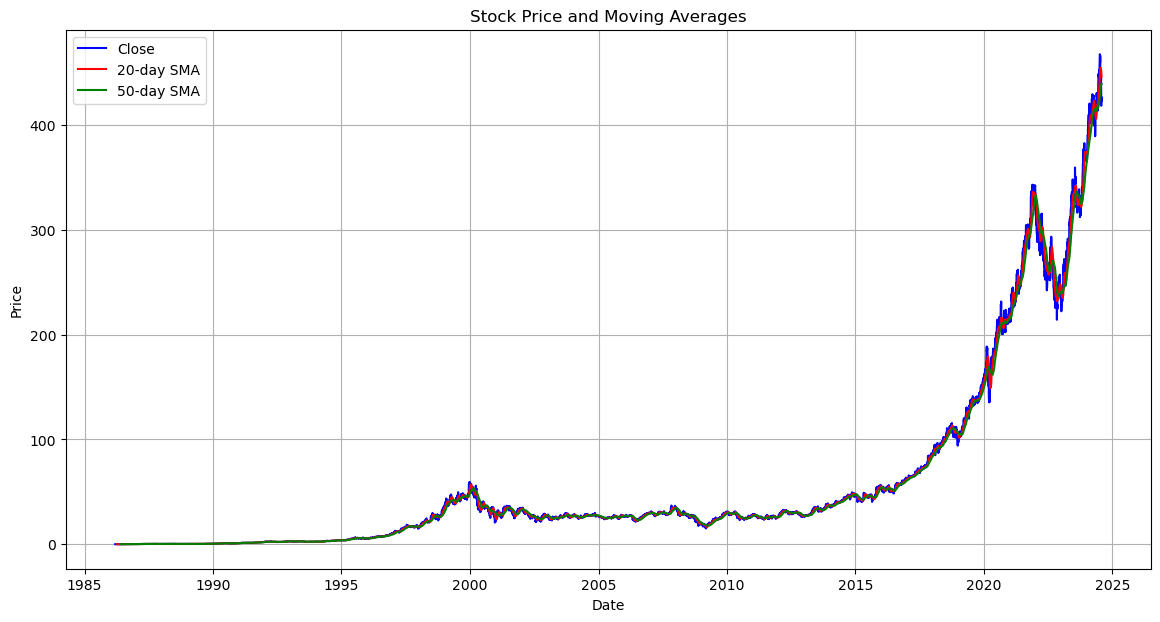

In [11]:
# Plot stock data with Moving Averages
dp.plot_stock_data(df)


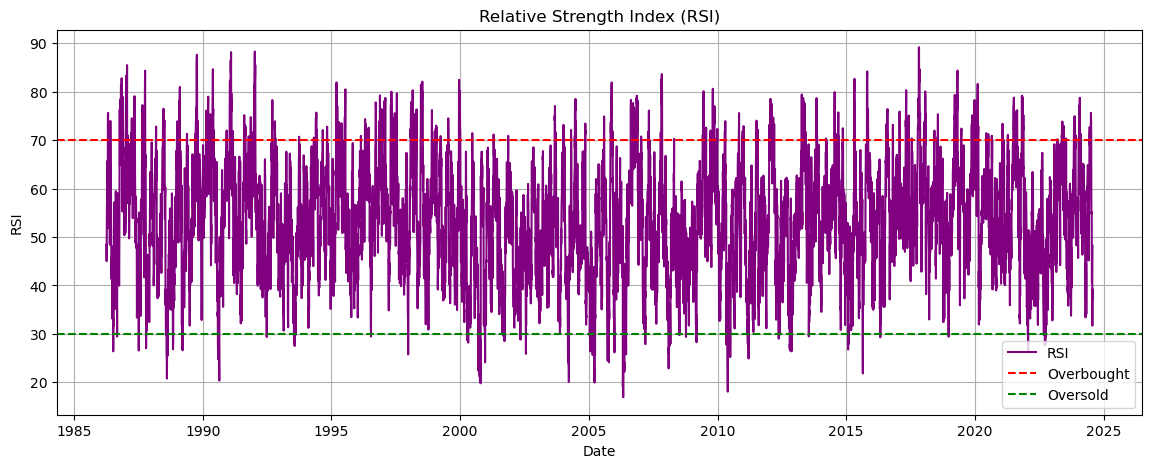

In [12]:
# Plot Relative Strength Index (RSI)
dp.plot_rsi(df)


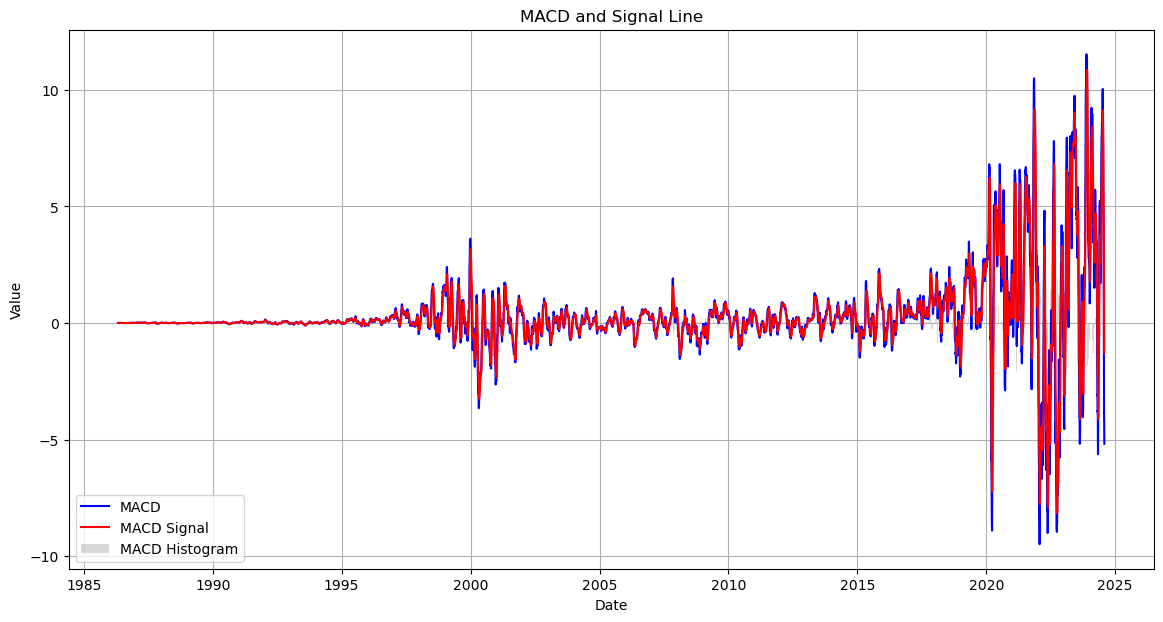

In [13]:
# Plot Moving Average Convergence Divergence (MACD)
dp.plot_macd(df)


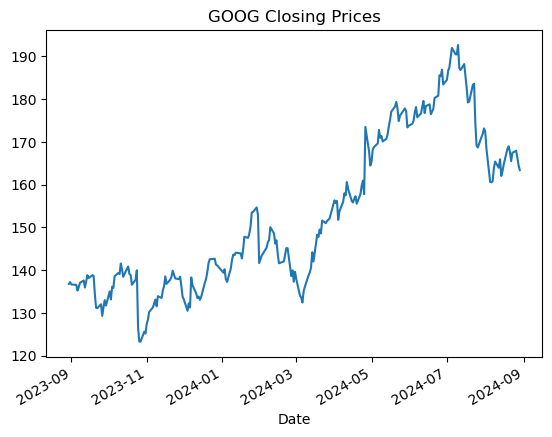

In [14]:
# Fetch historical stock data using yfinance
historical_data = dp.fetch_stock_data('GOOG')
historical_data['Close'].plot(title='GOOG Closing Prices')
plt.show()


In [16]:
# Calculate and print financial metrics
ticker = 'MSFT'
metrics = dp.financial_metrics(ticker)
print("Financial Metrics:\n", metrics)

Financial Metrics:
 {'PE_Ratio': 1.0, 'Market_Cap': 3070737514496, 'Dividend_Yield': 0.0073}
